## Aim of this class is to get familiar with the main sequence (MS) of star forming galaxies

do **NOT** copy the catalogues (they'll eat up your quota), use them directly via:

In [1]:
import pandas as pd
from astropy.io import fits
from astropy.table import Table

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from astropy.cosmology import FlatLambdaCDM

In [5]:
import astropy.units as u

#### merged catalogue from 1st classes:

In [6]:
szuflada_path = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/'
merged_file = szuflada_path + 'merged_cats.csv' # or .feather or .csv

In [7]:
merged = pd.read_csv(merged_file)

### TASK 1: create a MS plot for all the galaxies in the merged GAMA catalogue

In [8]:
list(merged.columns)

['Unnamed: 0',
 'magphys_CATAID',
 'magphys_Z',
 'magphys_f_mu_SFH_best_fit',
 'magphys_f_mu_SFH_percentile2_5',
 'magphys_f_mu_SFH_percentile16',
 'magphys_f_mu_SFH_percentile50',
 'magphys_f_mu_SFH_percentile84',
 'magphys_f_mu_SFH_percentile97_5',
 'magphys_f_mu_IR_best_fit',
 'magphys_f_mu_IR_percentile2_5',
 'magphys_f_mu_IR_percentile16',
 'magphys_f_mu_IR_percentile50',
 'magphys_f_mu_IR_percentile84',
 'magphys_f_mu_IR_percentile97_5',
 'magphys_mu_parameter_best_fit',
 'magphys_mu_parameter_percentile2_5',
 'magphys_mu_parameter_percentile16',
 'magphys_mu_parameter_percentile50',
 'magphys_mu_parameter_percentile84',
 'magphys_mu_parameter_percentile97_5',
 'magphys_tau_V_best_fit',
 'magphys_tau_V_percentile2_5',
 'magphys_tau_V_percentile16',
 'magphys_tau_V_percentile50',
 'magphys_tau_V_percentile84',
 'magphys_tau_V_percentile97_5',
 'magphys_sSFR_0_1Gyr_best_fit',
 'magphys_sSFR_0_1Gyr_percentile2_5',
 'magphys_sSFR_0_1Gyr_percentile16',
 'magphys_sSFR_0_1Gyr_percentile

In [9]:
merged = merged.query('magphys_mass_stellar_percentile50 > 7 & magphys_mass_stellar_percentile50 < 12 & magphys_SFR_0_1Gyr_percentile50 > -3 & magphys_SFR_0_1Gyr_percentile50 < 3')

In [10]:
# merged['mass_stellar_percentile50']

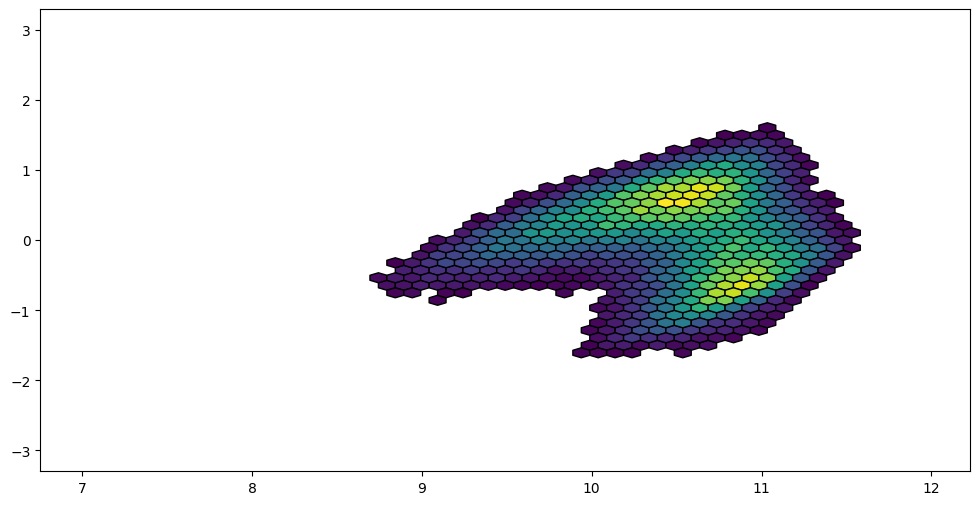

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12,  6))

ax.hexbin(merged['magphys_mass_stellar_percentile50'], merged['magphys_SFR_0_1Gyr_percentile50'], color='k', gridsize=50, mincnt=100)

### TASK 2: plot the Speagle+2014 MS line

what does it depend on? what are the implications of that?

In [12]:
cosm = FlatLambdaCDM(H0 = 70, Om0=0.3, Tcmb0=2.725)

z = np.median(merged['magphys_Z'])
t = cosm.age(z)
t

<Quantity 10.79303011 Gyr>

(6.0, 12.0)

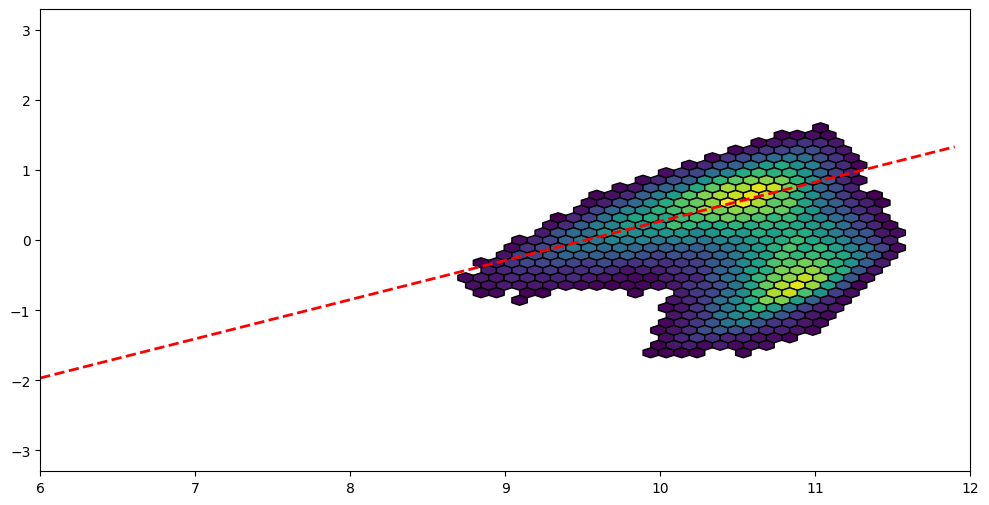

In [13]:
def Speagle_2014(stellar_masses):
    return (0.84 - 0.026*t.value)*stellar_masses - (6.51 - 0.11*t.value)

fig, ax = plt.subplots(1, 1, figsize=(12,  6))

stellar_masses = np.arange(6, 12, 0.1)

ax.hexbin(merged['magphys_mass_stellar_percentile50'], merged['magphys_SFR_0_1Gyr_percentile50'], color='k', gridsize=50, mincnt=100)
ax.plot(stellar_masses, Speagle_2014(stellar_masses), lw=2.0, ls='--', color='red', label='Speagle+2014, z=0.2224')

ax.set_xlim(6, 12)

### TASK 3: color-code late- and early-type galaxies

how to distinguish them?

In [14]:
etg = merged.query("sersic_GALINDEX_r > 4.0")
ltg = merged.query("sersic_GALINDEX_r < 2.5")
# gw = merged.query("2.5 < sersic_GALINDEX_r < 4.0")

(6.0, 12.0)

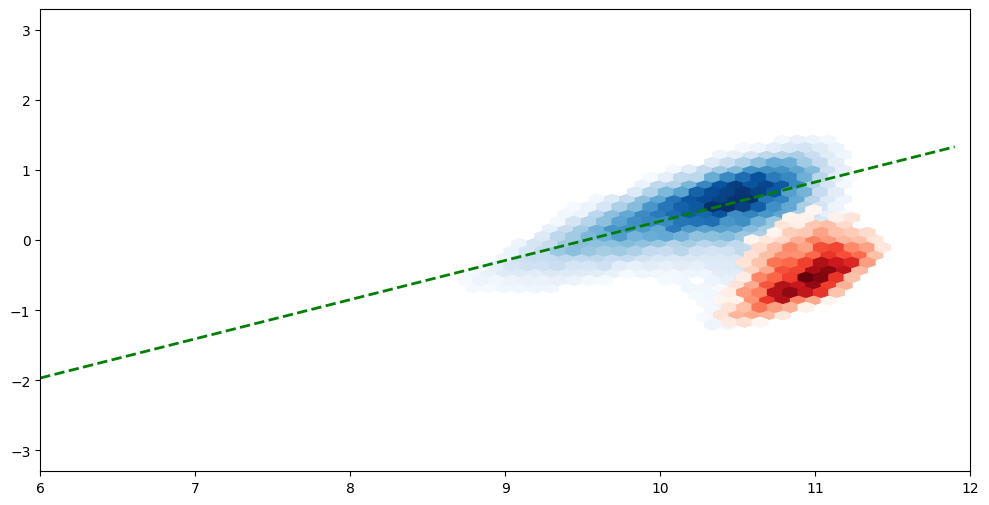

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,  6))

stellar_masses = np.arange(6, 12, 0.1)

ax.hexbin(ltg['magphys_mass_stellar_percentile50'], ltg['magphys_SFR_0_1Gyr_percentile50'], cmap="Blues", gridsize=50, mincnt=100)
ax.hexbin(etg['magphys_mass_stellar_percentile50'], etg['magphys_SFR_0_1Gyr_percentile50'], cmap="Reds", gridsize=50, mincnt=100)
# ax.hexbin(gw['magphys_mass_stellar_percentile50'], gw['magphys_SFR_0_1Gyr_percentile50'], color='green', gridsize=50, mincnt=100)

ax.plot(stellar_masses, Speagle_2014(stellar_masses), lw=2.0, ls='--', color='green', label='Speagle+2014, z=0.2224')

ax.set_xlim(6, 12)

In [16]:
### H/W - estimating the exact number of spirals and ellipticals in the GAMA catalogue

In [19]:
etg = merged.query("sersic_GALINDEX_r - 2*sersic_GALINDEXERR_r > 4.0 & sersic_GALINDEX_r > 0 & sersic_GALINDEXERR_r > 0")
print(f"Number of solid ETGs: {len(etg)}")

ltg = merged.query("sersic_GALINDEX_r + 2*sersic_GALINDEXERR_r < 2.5 & sersic_GALINDEX_r > 0 & sersic_GALINDEXERR_r > 0")
print(f"Number of solid LTGs: {len(ltg)}")

Number of solid ETGs: 12007
Number of solid LTGs: 100986
